In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["figure.dpi"] = (100)

from math import *
import scipy.constants
from OpticalBeam import *

In [2]:
f = 1.0e12
λ = scipy.constants.c/f
k = 2*pi*λ
zR = 1.0
w0 = sqrt(zR*λ/pi)
print(w0)

0.009768669468496662


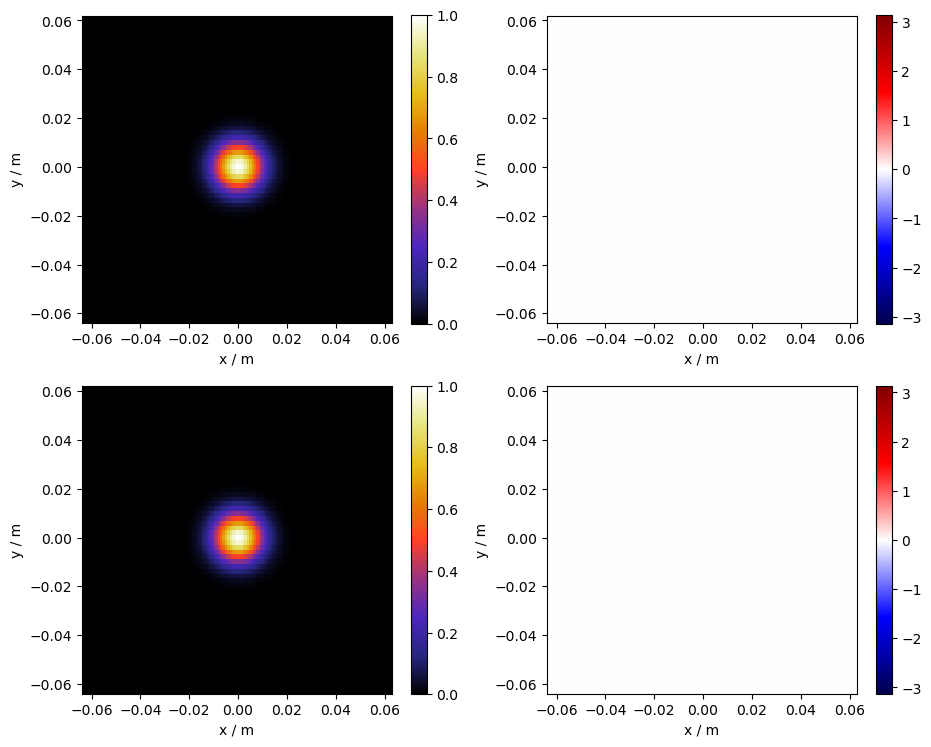

In [3]:
gbw = SingleFrequencyBeam.GaussianBeamWaist(f, 128, 64, 0.001, 0.002, w0, w0)
gbw.plot()
plt.show()

In [4]:
gbw.FitSizeW()

(0.019116776320318427,
 0.019117301600646754,
 0.019116776320318427,
 0.019117301600646754)

## fit the amplitude for waist size

In [5]:
ampl = np.log(np.abs(ReorderBeamMatrix(gbw.A_xi)).reshape(gbw.nx*gbw.ny))

In [6]:
ix1 = np.arange(gbw.nx)-(gbw.nx//2)
iy1 = np.arange(gbw.ny)-(gbw.ny//2)
x, y = np.meshgrid(ix1, iy1)
X = np.array([x,y]).transpose().reshape(gbw.nx*gbw.ny,2)
X

array([[-64, -32],
       [-64, -31],
       [-64, -30],
       ...,
       [ 63,  29],
       [ 63,  30],
       [ 63,  31]])

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

In [8]:
clf = linear_model.LinearRegression()
clf.fit(X_, ampl)
print(clf.coef_)


[ 0.00000000e+00 -1.98105421e-15 -1.25767452e-16 -1.04792251e-02
 -1.21430643e-17 -4.19169004e-02]


In [9]:
poly = PolynomialFeatures(degree=4)
X_ = poly.fit_transform(X)
clf = linear_model.LinearRegression()
clf.fit(X_, ampl)
print(clf.coef_)


[ 0.00000000e+00  3.91088749e-15  1.47164784e-14 -1.04792251e-02
 -3.78085613e-16 -4.19169004e-02  8.98764161e-18  6.05902850e-18
 -2.28574157e-18  5.81317554e-18  5.59041745e-19  1.29765448e-18
 -6.70955973e-19 -4.49710968e-18  4.58218355e-18]


the fitted coefficient of the quadratic term is 1/w² in pixel units

In [9]:
wx = 1.0/sqrt(-clf.coef_[3]) * gbw.dx
print(wx)
# the index 4 term is the correlation (mixed term)
wy = 1.0/sqrt(-clf.coef_[5]) * gbw.dy
print(wy)

0.00976866946849666
0.009768669468496652


λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
(0.013814984803790516, 0.013814984804277454, 0.013814984803790516, 0.013814984804277454)


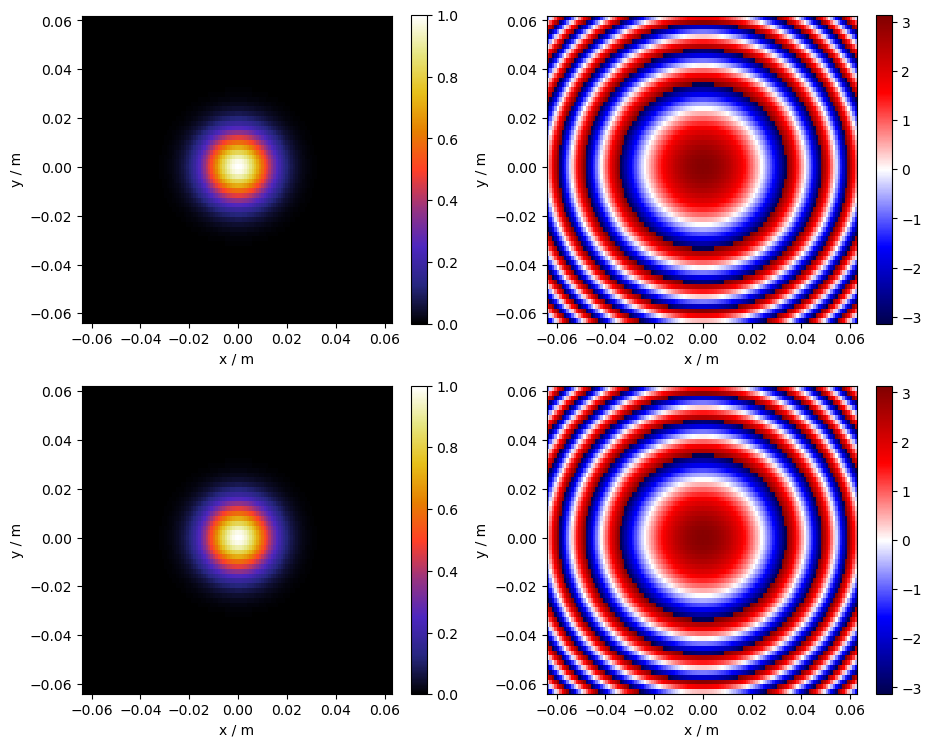

In [4]:
gb = SingleFrequencyBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, 1.0, 1.0)
print(gb.FitSizeW())
gb.plot()
plt.show()

(-5, 0)

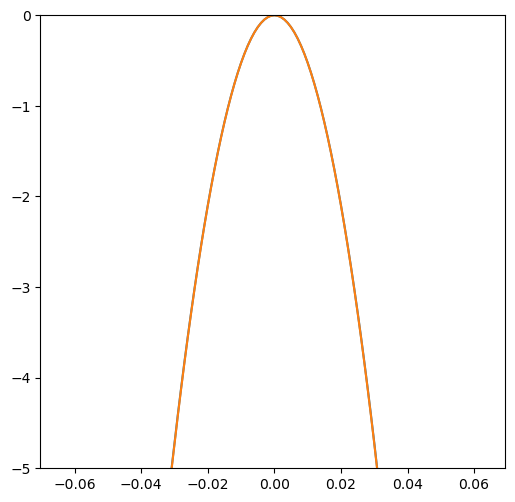

In [14]:
pos, amp = gb.Projection(polarization='xi', axis='x')
amp = np.log(amp)
amp = amp - np.max(amp)
w = 0.0138
gauss = -1.0/(w*w)*np.power(pos,2)
plt.plot(pos,amp)
plt.plot(pos,gauss)
plt.ylim(-5,0)